# Machine Learning, Exercise set #5

## 2. Bayesian linear regression

Sometimes we may want to derive the posterior distribution over the parameters $w$, instead of point estimates via ML and MAP.  
If we use a Gaussian likelihood and prior, we also get a Gaussian posterior:

$$\begin{aligned}
p(w) & = \mathcal{N}(w\mid w_0,V_0) && \text{prior} \\[2pt]
p(y\mid X,w) & = \mathcal{N}(y\mid Xw,\Sigma) && \text{likelihood} \\[10pt]
\Rightarrow p(x\mid X,y) & = \mathcal{N}(w\mid w_n,V_n) && \text{posterior} \\[5pt]
V_n & = (X^T\Sigma^{-1}X + V_0^{-1})^{-1} \\
w_n & = V_n (V_0^{-1}w_0 + X^T\Sigma^{-1}y)
\end{aligned}$$

### Generate data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = np.array([1., 2.])
cov = np.array([[1., 0.9], [0.9, 1.]])
x, y = np.random.multivariate_normal(mean, cov, 100).T
X = np.stack([np.ones_like(x), x], axis=1)

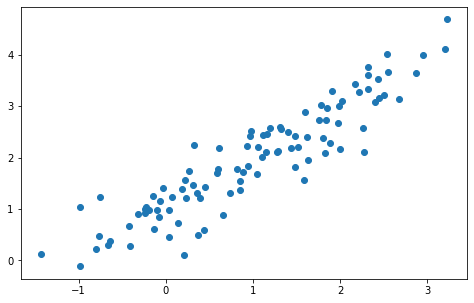

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(x, y);

### Bayesian linear regression

#### Define prior distribution
We choose a zero-mean prior and identity covariance matrices, i.e.

$$\begin{aligned}
p(w) & = \mathcal{N}(w\mid \begin{bmatrix}0&0\end{bmatrix}^T,I) && \text{prior} \\[2pt]
p(y\mid X,w) & = \mathcal{N}(y\mid Xw,I) && \text{likelihood}
\end{aligned}$$

In [4]:
w0 = np.zeros(2)
V0 = np.eye(2)

#### Define posterior parameters
$$\begin{aligned}
V_n & = (X^T\Sigma^{-1}X + V_0^{-1})^{-1} \\
w_n & = V_n (V_0^{-1}w_0 + X^T\Sigma^{-1}y)
\end{aligned}$$

In [5]:
Vn = np.linalg.inv(X.T @ X + np.linalg.inv(V0))
wn = Vn @ (np.linalg.inv(V0) @ w0 + X.T @ y)

#### Draw samples from the posterior distribution

In [6]:
w_samples = np.random.multivariate_normal(wn, Vn, 100)

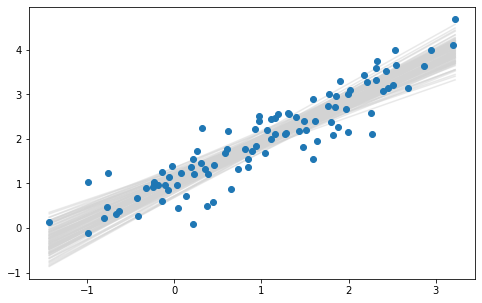

In [7]:
plt.figure(figsize=(8,5))
plt.scatter(x, y)

x_plot = np.linspace(np.min(x), np.max(x), 50)
X_plot = np.stack([np.ones_like(x_plot), x_plot], axis=1)

for w in w_samples:
    y_plot = X_plot @ w
    plt.plot(x_plot, y_plot, c='lightgray', alpha=0.5, zorder=0)